In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

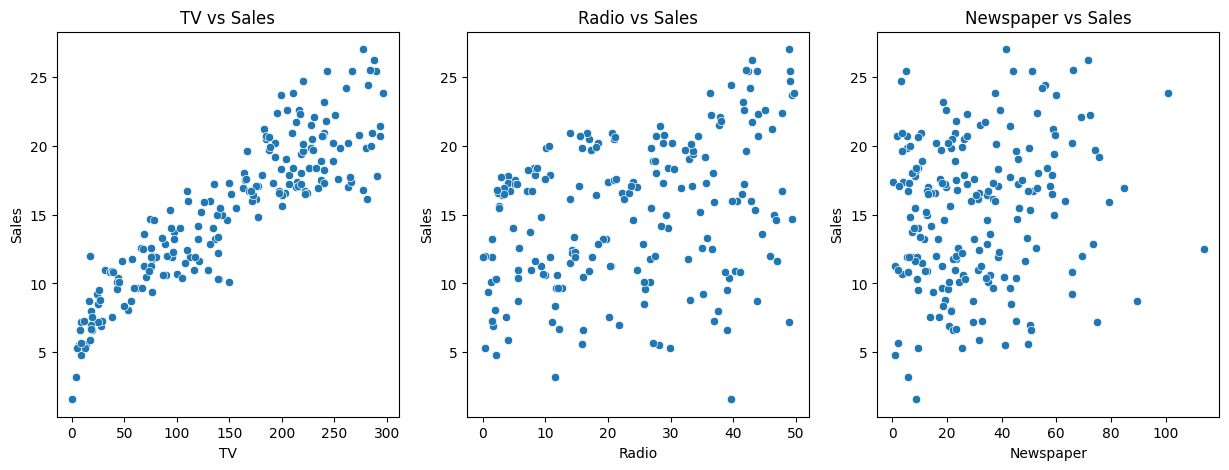

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='TV', y='Sales', data=data, ax=axs[0])
axs[0].set_title('TV vs Sales')
sns.scatterplot(x='Radio', y='Sales', data=data, ax=axs[1])
axs[1].set_title('Radio vs Sales')
sns.scatterplot(x='Newspaper', y='Sales', data=data, ax=axs[2])
axs[2].set_title('Newspaper vs Sales')
plt.show()

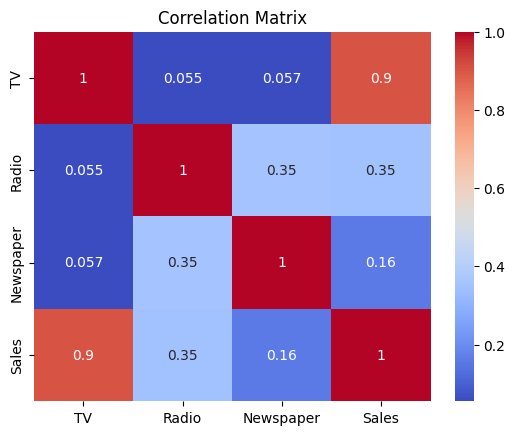

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [ ]:
y_test_pred = model.predict(X_test)


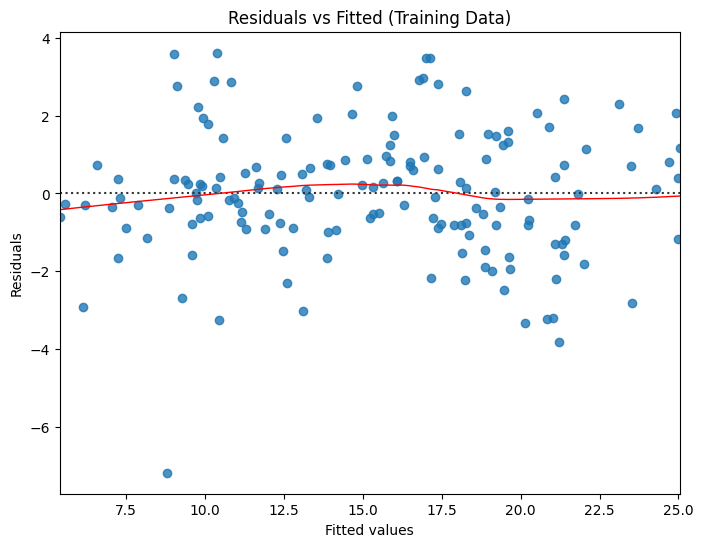

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, ax=ax, line_kws={'color': 'red', 'lw': 1})
ax.set_title('Residuals vs Fitted (Training Data)')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

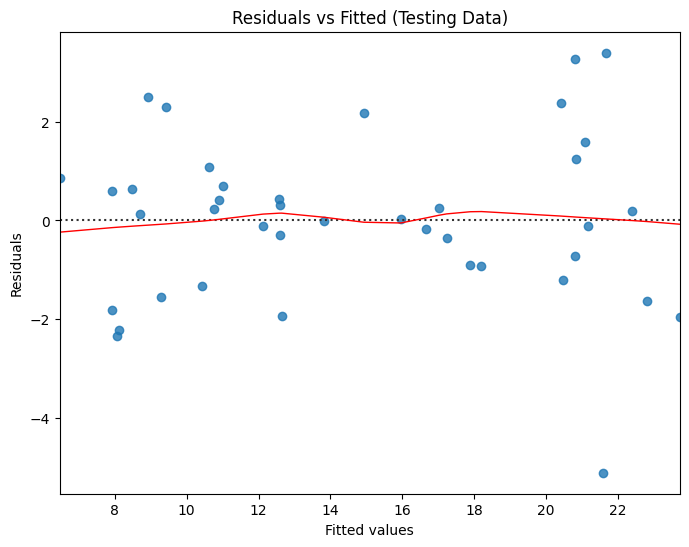

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=y_test_pred, y=y_test - y_test_pred, lowess=True, ax=ax, line_kws={'color': 'red', 'lw': 1})
ax.set_title('Residuals vs Fitted (Testing Data)')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

In [ ]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2) Score: {r2}')

Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R-squared (R^2) Score: 0.9059011844150826
